In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("Real estate.xlsx")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
x=df.drop("Y house price of unit area",axis=1)
y=df["Y house price of unit area"]

In [5]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
a=df.describe().columns

In [7]:
a

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

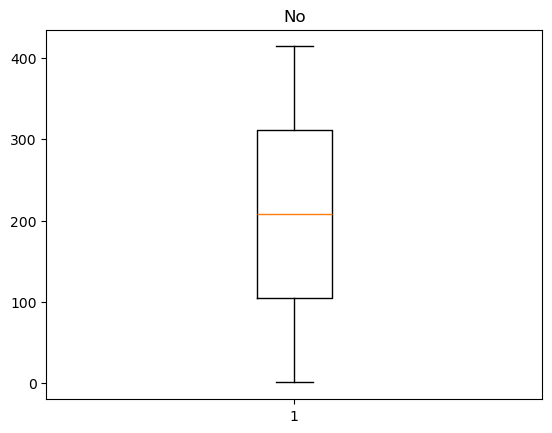

****************************************************************************************************


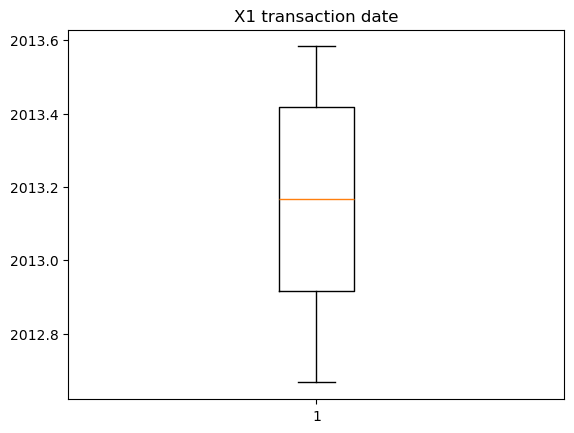

****************************************************************************************************


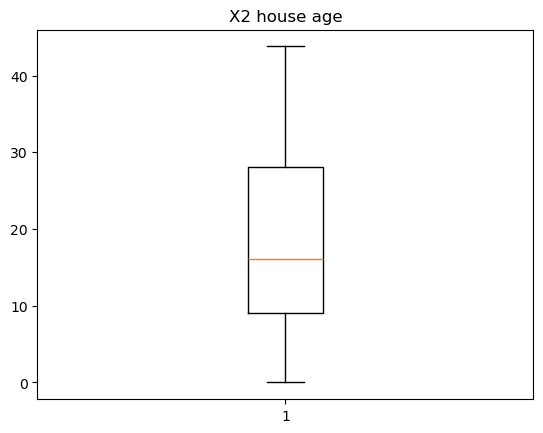

****************************************************************************************************


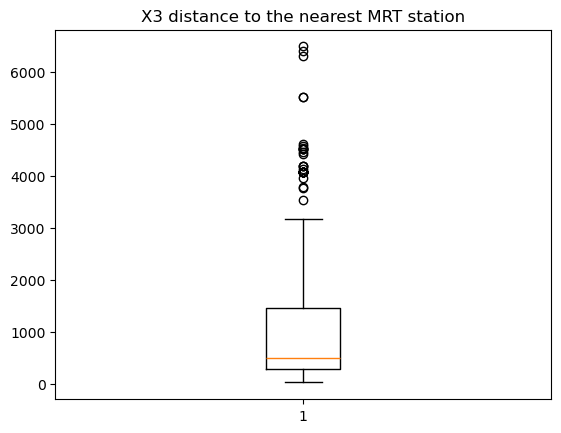

****************************************************************************************************


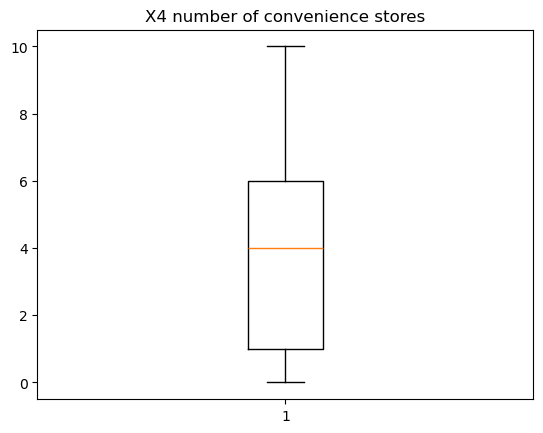

****************************************************************************************************


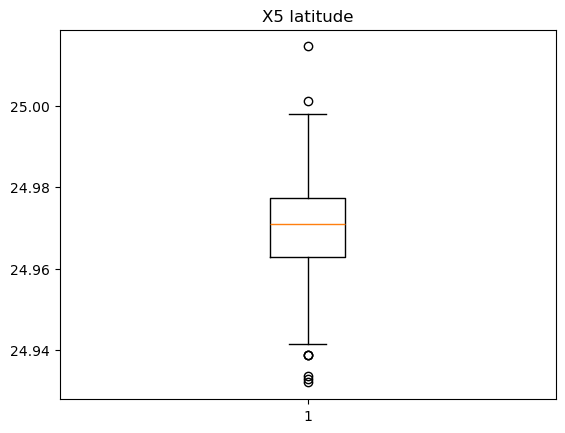

****************************************************************************************************


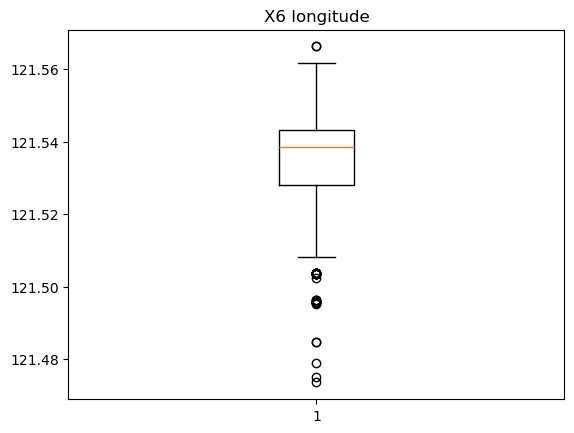

****************************************************************************************************


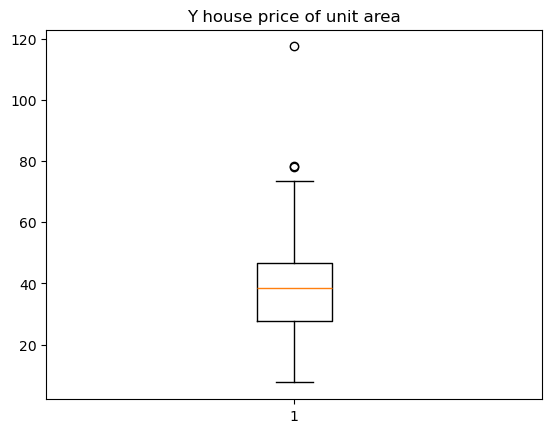

****************************************************************************************************


In [8]:
for i in a:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()
    print("*"*100)

In [9]:
for col in a:               # Removing the  all outliers 
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1

  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

  def outliers(value):
    if value < lower_bound:
      return lower_bound
    elif value > upper_bound:
      return upper_bound
    else:
      return value
    
  df[col]=df[col].apply(outliers)

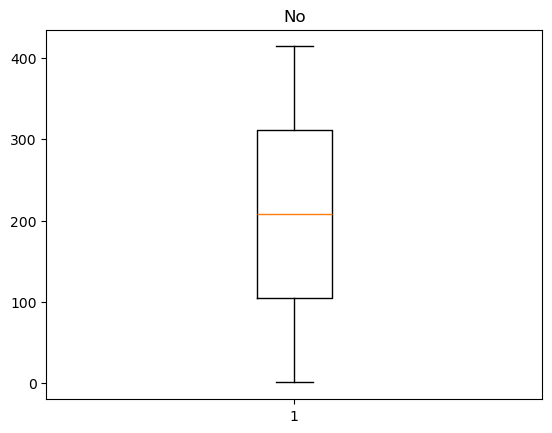

****************************************************************************************************


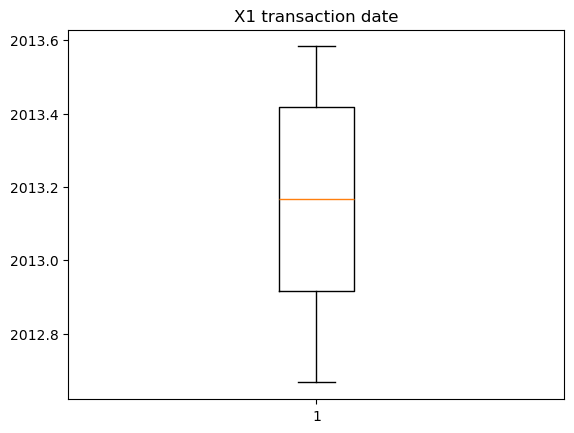

****************************************************************************************************


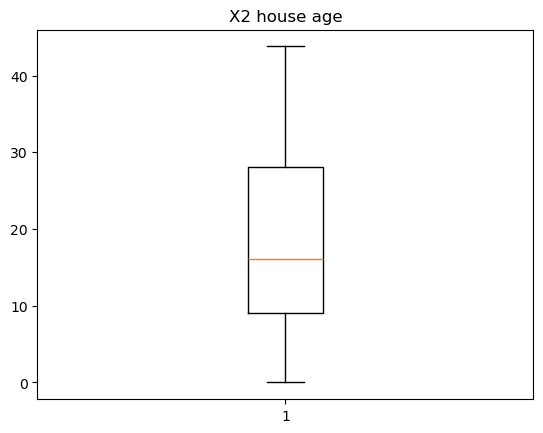

****************************************************************************************************


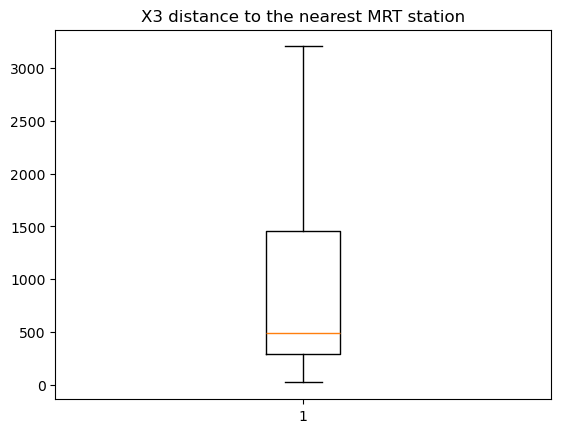

****************************************************************************************************


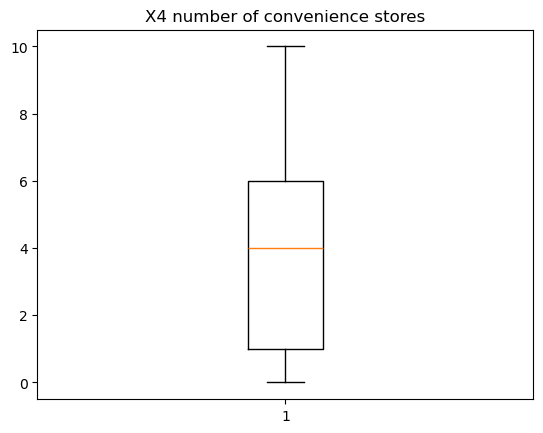

****************************************************************************************************


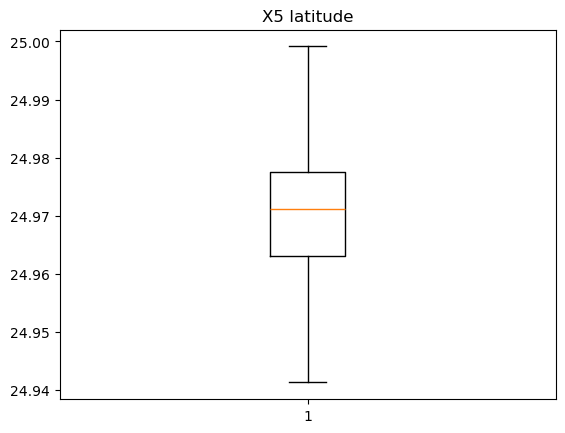

****************************************************************************************************


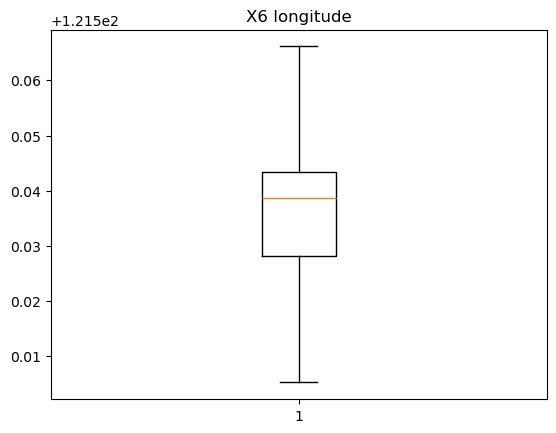

****************************************************************************************************


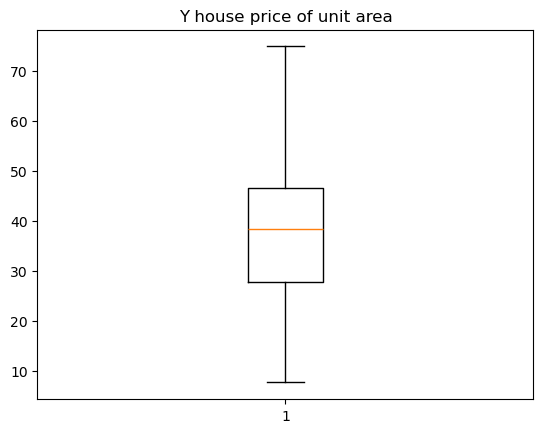

****************************************************************************************************


In [10]:
for i in a:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()
    print("*"*100)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc=StandardScaler()

In [13]:
a

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [14]:
for i in x:
    x[i]=sc.fit_transform(x[[i]])

In [15]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.540240,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.539510,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.543910,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.543910,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.542450,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,3201.71030,0,24.94155,121.505255,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.543100,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.539860,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.540670,52.5


In [16]:
x

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,-1.727872,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762
1,-1.719505,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139
2,-1.711137,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183
3,-1.702770,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183
4,-1.694402,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937
...,...,...,...,...,...,...,...
409,1.694402,-0.528967,-0.352637,2.378365,-1.391638,-2.216993,-1.927835
410,1.702770,-1.711384,-1.064493,-0.788071,1.667503,0.427579,0.635341
411,1.711137,0.358734,0.095568,-0.549678,0.987694,0.822893,0.423972
412,1.719505,-0.528967,-0.844784,-0.776684,0.307885,-0.184755,0.476814


In [17]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=25)
x_train

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
97,-0.916232,-0.234250,0.939248,-0.370021,-0.371925,0.680096,-0.024209
197,-0.079490,0.358734,1.466548,-0.759296,1.327598,-0.017755,0.491167
263,0.472759,0.951718,-1.213894,0.843649,-0.371925,-0.487291,-1.338742
19,-1.568891,-1.711384,-1.424814,-0.841279,0.987694,-0.105692,0.499647
200,-0.054388,0.951718,-0.027469,-0.069912,-1.391638,-0.482451,1.030027
...,...,...,...,...,...,...,...
374,1.401543,0.358734,-1.082069,-0.549997,0.307885,0.834188,0.592937
317,0.924600,-1.416667,-0.185659,-0.262671,-0.711829,0.719628,0.074952
143,-0.531331,1.246435,-0.361426,-0.469349,0.307885,-0.313030,0.261531
318,0.932967,0.653451,-0.932668,-0.558731,2.007407,1.161734,0.277840


In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train, y_train)

KNeighborsRegressor()

# Model Evaluation

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
# Testing Dataset

y_pred = knn_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print("*"*40)

rmse = np.sqrt(mse)
print("RMSE :", rmse)
print("*"*40)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print("*"*40)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 61.59283373493977
****************************************
RMSE : 7.848110201503275
****************************************
MAE : 5.926506024096384
****************************************
R Squared : 0.6646789700442891


In [25]:
# Training Dataset

y_pred_train = knn_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print("*"*40)

rmse = np.sqrt(mse)
print("RMSE :", rmse)
print("*"*40)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print("*"*40)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 54.43049667673716
****************************************
RMSE : 7.377702669309543
****************************************
MAE : 4.940302114803624
****************************************
R Squared : 0.7056344259094756


In [29]:
knn_reg.score(x_train,y_train)

0.7056344259094756

In [27]:
knn_reg.score(x_test,y_test)

0.6646789700442891

In [37]:
# Standardaalized 

from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [41]:
a=StandardScaler()

In [47]:
x=a.fit_transform(x)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=25)
x_train

array([[-0.91623245, -0.23425003,  0.9392482 , ..., -0.37192457,
         0.68009616, -0.02420874],
       [-0.07949049,  0.35873395,  1.46654841, ...,  1.32759829,
        -0.01775465,  0.49116652],
       [ 0.47275921,  0.95171793, -1.21389434, ..., -0.37192457,
        -0.48729127, -1.33874183],
       ...,
       [-0.53133115,  1.24643452, -0.36142566, ...,  0.30788458,
        -0.31303026,  0.26153096],
       [ 0.93296729,  0.65345054, -0.93266756, ...,  2.00740743,
         1.16173424,  0.2778403 ],
       [-0.62337276,  0.06401736,  0.78105813, ...,  0.30788458,
         0.42757905,  0.34373005]])

In [53]:
knn_reg_scal = KNeighborsRegressor()

In [55]:
knn_reg_scal.fit(x_train,y_train)

KNeighborsRegressor()

In [57]:
knn_reg_scal.score(x_train,y_train)

0.7056344259094756

In [59]:
knn_reg_scal.score(x_test,y_test)

0.6646789700442891

In [63]:
r2_train_list = []
r2_test_list = []
k_value = np.arange(1,30)

for k in k_value:
    knn_reg = KNeighborsRegressor(n_neighbors=k, p=2)
    knn_reg.fit(x_train,y_train)

    r2_score_train = knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_score_train)

    r2_score_test =knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_score_test)

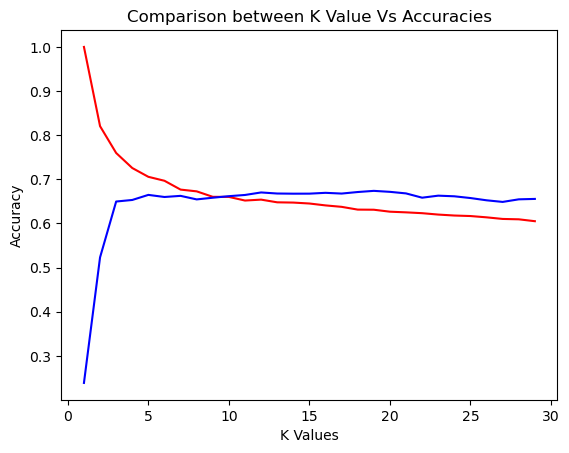

In [67]:
plt.plot(k_value, r2_train_list,color="red")
plt.plot(k_value, r2_test_list,color="blue")
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.title("Comparison between K Value Vs Accuracies")
plt.savefig("K Values Vs Accuracy P=2.jpeg")

In [75]:
knn_reg =KNeighborsRegressor(n_neighbors=11,p=1)
knn_reg.fit(x_train,y_train)

r2_score_train = knn_reg.score(x_train,y_train)
r2_score_test = knn_reg.score(x_test,y_test)

In [77]:
r2_score_train

0.6836588665140934

In [79]:
r2_score_test

0.6943536343007258